<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_time_series/blob/master/matrix_5_day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fbprophet
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error as mea

In [2]:
# should be '0.6'
fbprophet.__version__


'0.6'

In [3]:
# should be '2.19.1.1'
pystan.__version__

'2.19.1.1'

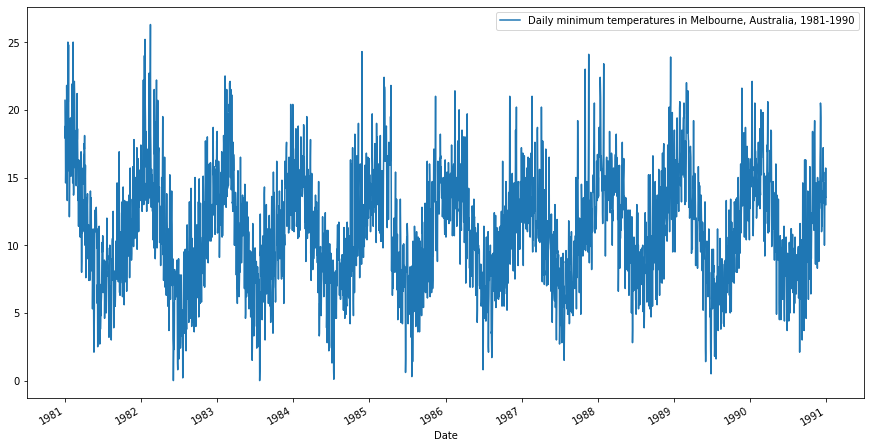

In [4]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'
#or https://drive.google.com/open?id=181fmoHLosOYRbNG6NlxMoq535_Q-W3eT
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(figsize =(15,8))

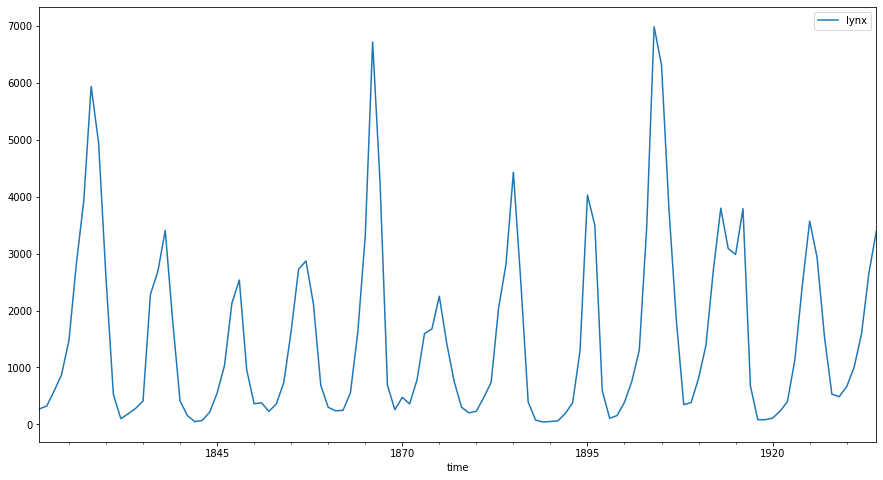

In [7]:
path2 = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'
df = pd.read_csv(path2, parse_dates=['time'], index_col='time')
df.plot(figsize =(15,8));


In [9]:
path3= 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(path3)
df

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07
...,...,...,...,...,...,...,...,...,...
2316,2018,10,7,2018.7658,405.58,7,403.38,382.78,129.25
2317,2018,10,14,2018.7849,406.00,6,403.81,382.92,129.45
2318,2018,10,21,2018.8041,406.62,7,404.04,383.04,129.77
2319,2018,10,28,2018.8233,406.48,6,404.07,383.96,129.29


In [0]:
df['data'] = df.apply(lambda row: (str(int(row['year']))+'-'+str(int(row['month']))+'-'+str(int(row['day']))) , axis = 1 )
df['data'] = pd.to_datetime(df['data'] )
df.index = df['data']

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


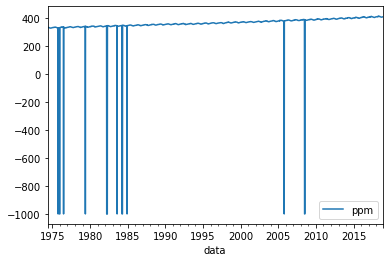

In [14]:
df[['ppm']].plot()

In [0]:
# other way
df.index=pd.to_datetime(df[['year', 'month' , 'day']])

In [17]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800,data
1974-05-19,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36,1974-05-19
1974-05-26,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
1974-06-02,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57,1974-06-02
1974-06-09,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63,1974-06-09
1974-06-16,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07,1974-06-16


In [21]:
df[['ppm']].plot();

,ppm
1974-05-19,333.34
1974-05-26,332.95
1974-06-02,332.32
1974-06-09,332.18
1974-06-16,332.37
...,...
2018-10-07,405.58
2018-10-14,406.00
2018-10-21,406.62
2018-10-28,406.48


Fix data

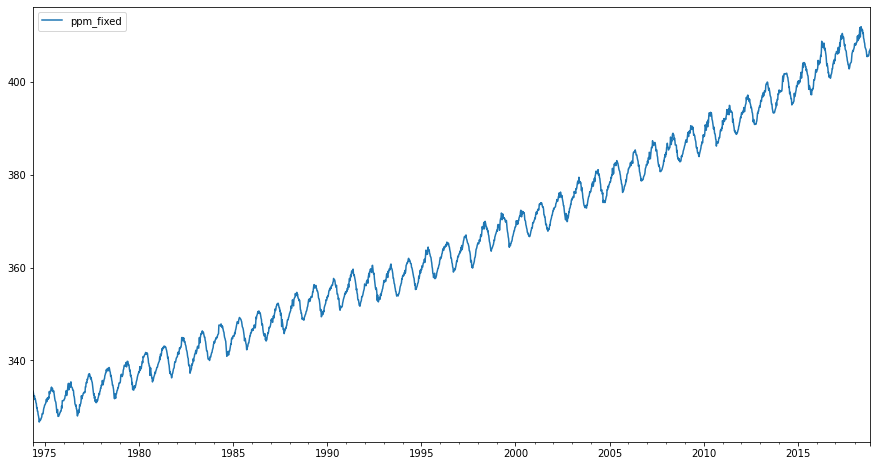

In [24]:
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna(method ='backfill')
df[['ppm_fixed']].plot(figsize =(15,8))

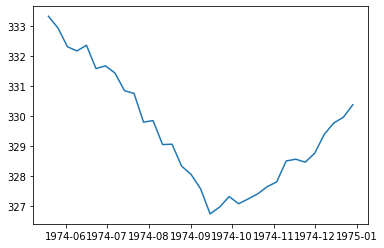

In [28]:
df1974 = df[df.year ==1974]

plt.plot(df1974.index, df1974['ppm_fixed'])

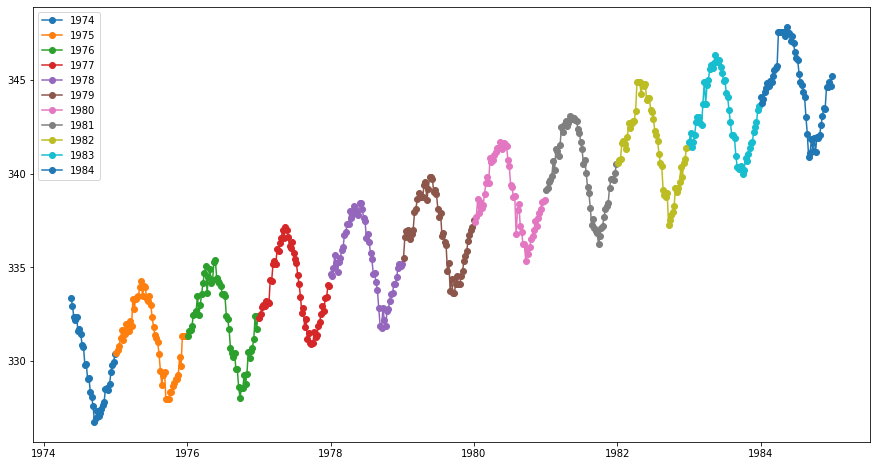

In [30]:
plt.figure(figsize = (15,8))
for year in range(1974, 1985):
  df_year = df[df.year == year]
  plt.plot(df_year.index, df_year['ppm_fixed'], 'o-', label = year)

plt.legend();